In [104]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [105]:
dataFrame = pd.read_csv('listings.csv')

In [106]:
# Choose the columns to be worked on
df = dataFrame[['host_response_time', 'host_response_rate','host_acceptance_rate', 'host_is_superhost','host_listings_count', 'host_total_listings_count', 'host_verifications','host_has_profile_pic', 'host_identity_verified','neighbourhood_cleansed','property_type', 'room_type', 'accommodates', 'bathrooms','bedrooms', 'beds', 'price','availability_30', 'availability_60', 'availability_90','availability_365','number_of_reviews','review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin','review_scores_communication', 'review_scores_location','review_scores_value','instant_bookable']]

In [107]:
# filling the missing values with the mode in categorical and boolean columns
categorical_and_boolean_columns = ['host_response_time', 'host_response_rate', 'host_acceptance_rate',
                       'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified','host_is_superhost', 
                                   'host_has_profile_pic','host_identity_verified','neighbourhood_cleansed',
                                   'property_type','room_type','instant_bookable','host_verifications']

for col in categorical_and_boolean_columns:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)


C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_11436\1466373218.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(mode_value, inplace=True)


In [108]:
# Convert host_verifications column into zeros and ones form for analysis
def clean_string(x):
    return x.replace("'", "").replace("[", "").replace("]", "").strip()

df['host_verifications'] = df['host_verifications'].apply(clean_string)
df['host_verifications'] = df['host_verifications'].str.split(',').apply(lambda x: [item.strip() for item in x])
df = pd.get_dummies(df.explode('host_verifications'), columns=['host_verifications'], prefix='', prefix_sep='',dtype=int)

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_11436\3632743347.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['host_verifications'] = df['host_verifications'].apply(clean_string)
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_11436\3632743347.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['host_verifications'] = df['host_verifications'].str.split(',').apply(lambda x: [item.strip() for item in x])


In [109]:
# Prepare numeric columns for analysis
def remove_outliers(df):
    for column in df.select_dtypes(include=['number']):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3-Q1
        lowerBound = Q1 - IQR * 1.5
        upperBound = Q3 + IQR * 1.5
        df = df[(df[column] >= lowerBound) & (df[column] <= upperBound)]
    return df
df = remove_outliers(df)
df.interpolate()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,email,phone,work_email
14,within an hour,100%,94%,t,15,15,t,t,TENTH WARD,Private room in home,...,4.75,4.46,4.86,4.81,4.73,4.68,t,1,0,0
14,within an hour,100%,94%,t,15,15,t,t,TENTH WARD,Private room in home,...,4.75,4.46,4.86,4.81,4.73,4.68,t,0,1,0
15,within an hour,100%,83%,t,2,2,t,t,SIXTH WARD,Private room in rental unit,...,4.89,4.57,4.82,4.89,4.71,4.75,f,1,0,0
15,within an hour,100%,83%,t,2,2,t,t,SIXTH WARD,Private room in rental unit,...,4.89,4.57,4.82,4.89,4.71,4.75,f,0,1,0
17,within an hour,100%,94%,t,15,15,t,t,TENTH WARD,Private room in home,...,4.79,4.56,4.94,4.79,4.66,4.77,t,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,within an hour,100%,100%,f,1,1,t,f,FOURTH WARD,Shared room in rental unit,...,5.00,5.00,5.00,5.00,5.00,5.00,f,0,1,0
395,within an hour,100%,98%,f,3,3,t,t,ELEVENTH WARD,Entire rental unit,...,5.00,5.00,4.86,4.86,4.29,5.00,t,1,0,0
395,within an hour,100%,98%,f,3,3,t,t,ELEVENTH WARD,Entire rental unit,...,5.00,5.00,4.86,4.86,4.29,5.00,t,0,1,0
398,within an hour,100%,99%,t,2,4,t,t,SIXTH WARD,Entire rental unit,...,5.00,5.00,5.00,5.00,4.40,4.80,f,1,0,0


In [110]:
# Convert true and false into 0 and 1
d = {'t': 1,'f':0}
df['host_is_superhost'] = df['host_is_superhost'].map(d)
df['host_has_profile_pic'] = df['host_has_profile_pic'].map(d)
df['host_identity_verified'] = df['host_identity_verified'].map(d)
df['instant_bookable'] = df['instant_bookable'].map(d)

In [111]:
df['average_rating'] = df[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']].sum(axis=1) / 7
# Categorize the average rating column into five categories:
# 0 -> 1 , ... , 4 -> 5
intervals = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5),(5,6)]
categories = [0,1,2,3,4,5]
df['rating_categories'] = pd.cut(df['average_rating'], bins=[0,1,2,3,4,5,6], labels=categories, right = False)
df.drop(['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value'],axis=1,inplace=True)

In [112]:
# Encode the rest of string columns
def label_encode(column):
    label = LabelEncoder()
    encoded_labels = label.fit_transform(column)
    label_mapping = {label: code for label,code in zip(label.classes_,label.transform(label.classes_))}
    print(label_mapping)
    return encoded_labels

columns_to_encode = ['host_response_time', 'neighbourhood_cleansed', 'property_type', 'room_type']

for column in columns_to_encode:
    df[column] = label_encode(df[column])

{'a few days or more': 0, 'within a day': 1, 'within a few hours': 2, 'within an hour': 3}
{'ELEVENTH WARD': 0, 'FIFTEENTH WARD': 1, 'FIFTH WARD': 2, 'FIRST WARD': 3, 'FOURTEENTH WARD': 4, 'FOURTH WARD': 5, 'NINTH WARD': 6, 'SECOND WARD': 7, 'SEVENTH WARD': 8, 'SIXTH WARD': 9, 'TENTH WARD': 10, 'THIRD WARD': 11, 'THIRTEENTH WARD': 12, 'TWELFTH WARD': 13}
{'Entire condo': 0, 'Entire home': 1, 'Entire loft': 2, 'Entire rental unit': 3, 'Entire townhouse': 4, 'Private room in bed and breakfast': 5, 'Private room in guest suite': 6, 'Private room in home': 7, 'Private room in rental unit': 8, 'Private room in townhouse': 9, 'Room in hotel': 10, 'Shared room in rental unit': 11}
{'Entire home/apt': 0, 'Private room': 1, 'Shared room': 2}


In [113]:
# Convert price column into numeric column for analysis
df['price'] = df['price'].str.replace('$','').str.strip().astype(float)

Text(0, 0.5, 'Average Rate')

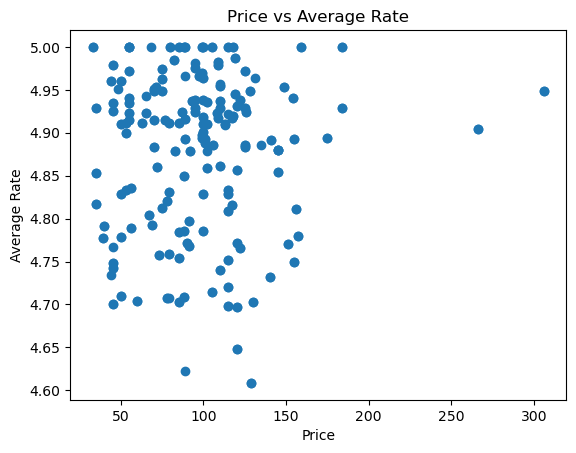

In [114]:
plt.scatter(df['price'],df['average_rating'])
plt.title('Price vs Average Rate')
plt.xlabel('Price')
plt.ylabel('Average Rate')

#### The previous graph shows answers the question: Does the high price means neccesarily that the rating will be high  
#### The answer is no, as we can see it does not matter

C:\Users\Mahmoud\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


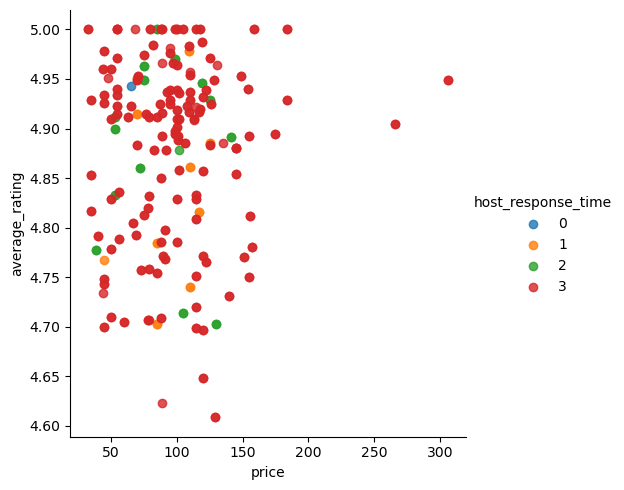

In [115]:
sns.lmplot(x='price',y='average_rating',data=df,hue='host_response_time',fit_reg=False)

#### The previous graph shows answers the question: Does the response time affects the rating?
#### The answer is yes, as we can see most of the highest average ratings is when the host responded within an hour
#### 'a few days or more': 0
#### 'within a day': 1
#### 'within a few hours': 2
#### 'within an hour': 3

C:\Users\Mahmoud\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


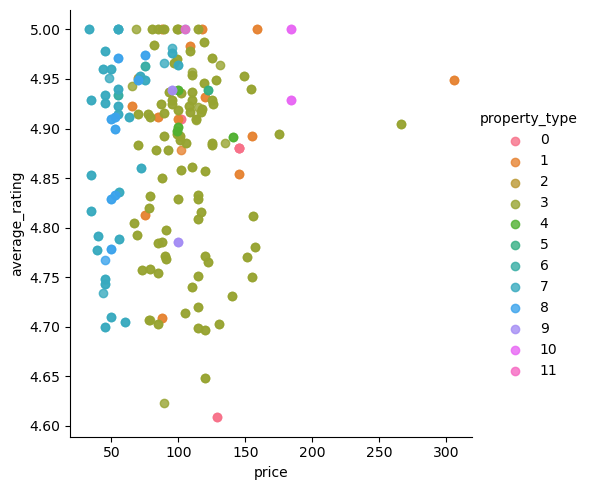

In [116]:
sns.lmplot(x='price',y='average_rating',data=df,hue='property_type',fit_reg=False)

#### The previous graph shows answers the question: Does the property type affects the rating and the price?
#### The answer is yes, as we can see if the property type is Room in hotel then it is most likely to have higher rating and pricing, where if it is Shared room in rental unit then it will have lower rating and pricing
#### 'Entire condo': 0, 
#### 'Entire home': 1, 
#### 'Entire loft': 2, 
#### 'Entire rental unit': 3, 
#### 'Entire townhouse': 4, 
#### 'Private room in bed and breakfast': 5, 
#### 'Private room in guest suite': 6, 
#### 'Private room in home': 7, 
#### 'Private room in rental unit': 8, 
#### 'Private room in townhouse': 9, 
#### 'Room in hotel': 10, 
#### 'Shared room in rental unit': 11

C:\Users\Mahmoud\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


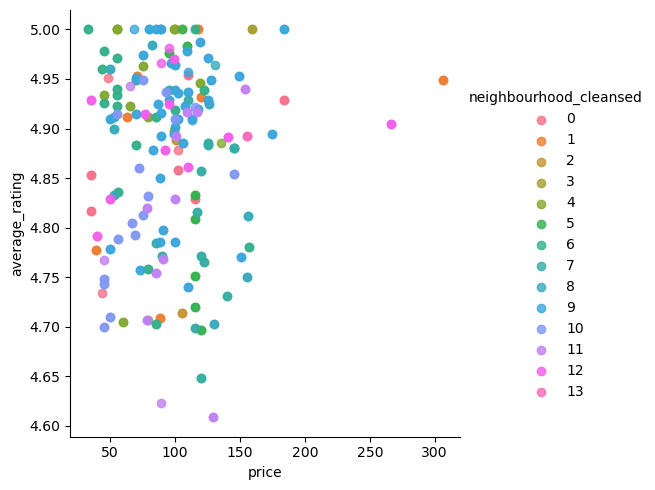

In [117]:
sns.lmplot(x='price',y='average_rating',data=df,hue='neighbourhood_cleansed',fit_reg=False)

#### The previous graph shows answers the question: Does the neighbourhood cleansed affects the rating and the price?
#### The answer is yes, as we can see if the neighbourhood cleansed is SIXTH WARD then it is most likely to have higher rating and good pricing
#### 'ELEVENTH WARD': 0,
#### 'FIFTEENTH WARD': 1,
#### 'FIFTH WARD': 2, 
#### 'FIRST WARD': 3, 
#### 'FOURTEENTH WARD': 4, 
#### 'FOURTH WARD': 5, 
#### 'NINTH WARD': 6, 
#### 'SECOND WARD': 7, 
#### 'SEVENTH WARD': 8, 
#### 'SIXTH WARD': 9, 
#### 'TENTH WARD': 10, 
#### 'THIRD WARD': 11
#### 'THIRTEENTH WARD': 12, 
#### 'TWELFTH WARD': 13 

Text(0, 0.5, 'Average Rate')

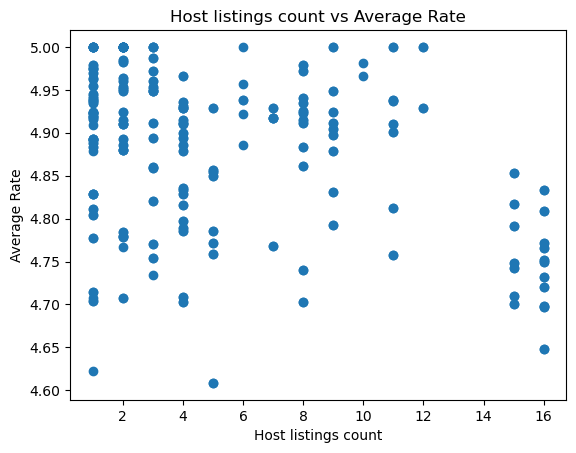

In [118]:
plt.scatter(df['host_listings_count'],df['average_rating'])
plt.title('Host listings count vs Average Rate')
plt.xlabel('Host listings count')
plt.ylabel('Average Rate')

#### From the previous graph we can deduce that if the host listing count is between 1 and 12 it will likely have higher rating


Text(0, 0.5, 'Average Rate')

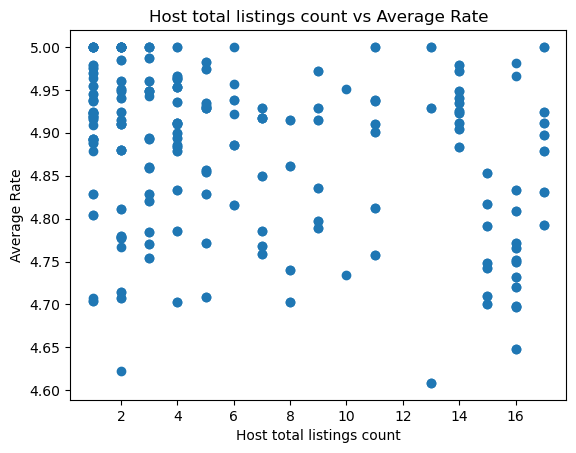

In [119]:
plt.scatter(df['host_total_listings_count'],df['average_rating'])
plt.title('Host total listings count vs Average Rate')
plt.xlabel('Host total listings count')
plt.ylabel('Average Rate')

#### From the previous graph we can deduce that if the host total listing count is between 1 and 14 it will likely have higher rating


Text(0, 0.5, 'Average Rate')

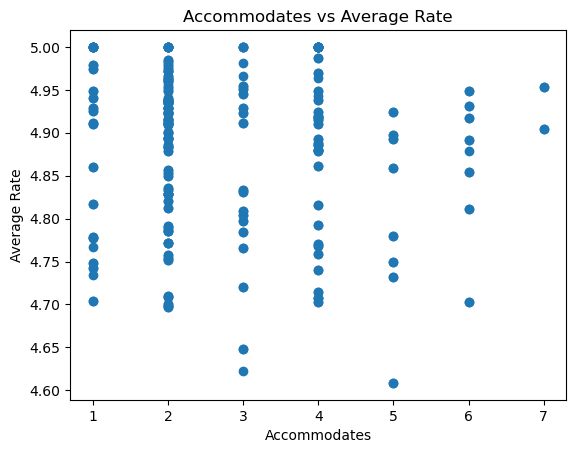

In [120]:
plt.scatter(df['accommodates'],df['average_rating'])
plt.title('Accommodates vs Average Rate')
plt.xlabel('Accommodates')
plt.ylabel('Average Rate')

#### From the previous graph we can deduce that there is no relation between the number of accommodates and the rating


Text(0, 0.5, 'Average Rate')

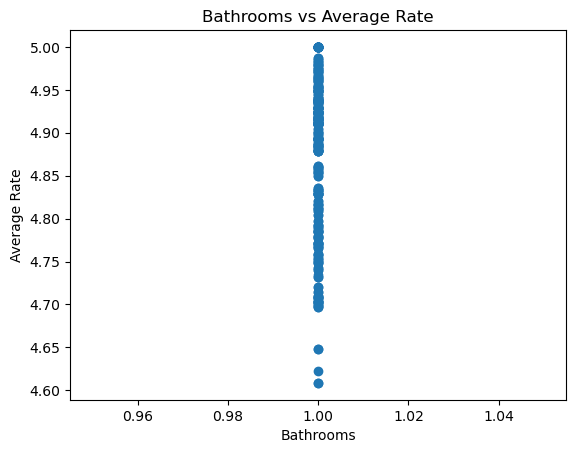

In [121]:
plt.scatter(df['bathrooms'],df['average_rating'])
plt.title('Bathrooms vs Average Rate')
plt.xlabel('Bathrooms')
plt.ylabel('Average Rate')

#### From the previous graph we can not get any useful information as the number of bathrooms is constant = 1


Text(0, 0.5, 'Average Rate')

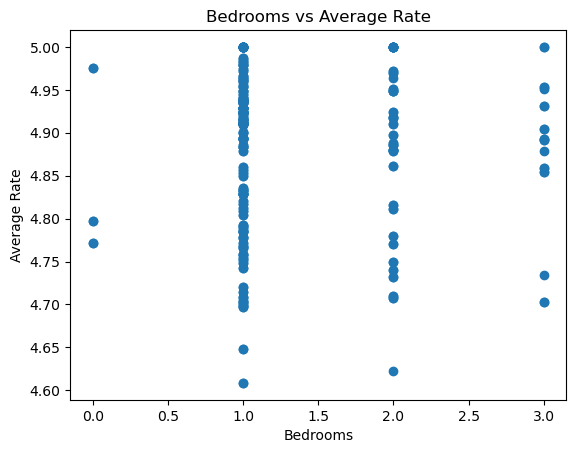

In [122]:
plt.scatter(df['bedrooms'],df['average_rating'])
plt.title('Bedrooms vs Average Rate')
plt.xlabel('Bedrooms')
plt.ylabel('Average Rate')

#### From the previous graph we can see that when the number of bedrooms is equal to 3 it will likely has high rating


Text(0, 0.5, 'Average Rate')

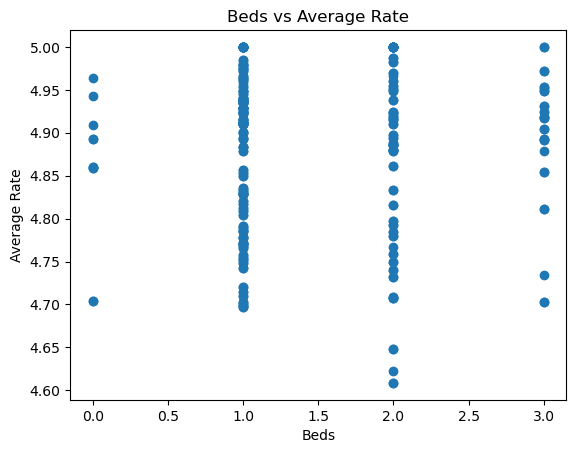

In [123]:
plt.scatter(df['beds'],df['average_rating'])
plt.title('Beds vs Average Rate')
plt.xlabel('Beds')
plt.ylabel('Average Rate')

#### From the previous graph we can see that  when the number fo beds is equal to 3 it will likely has high rating


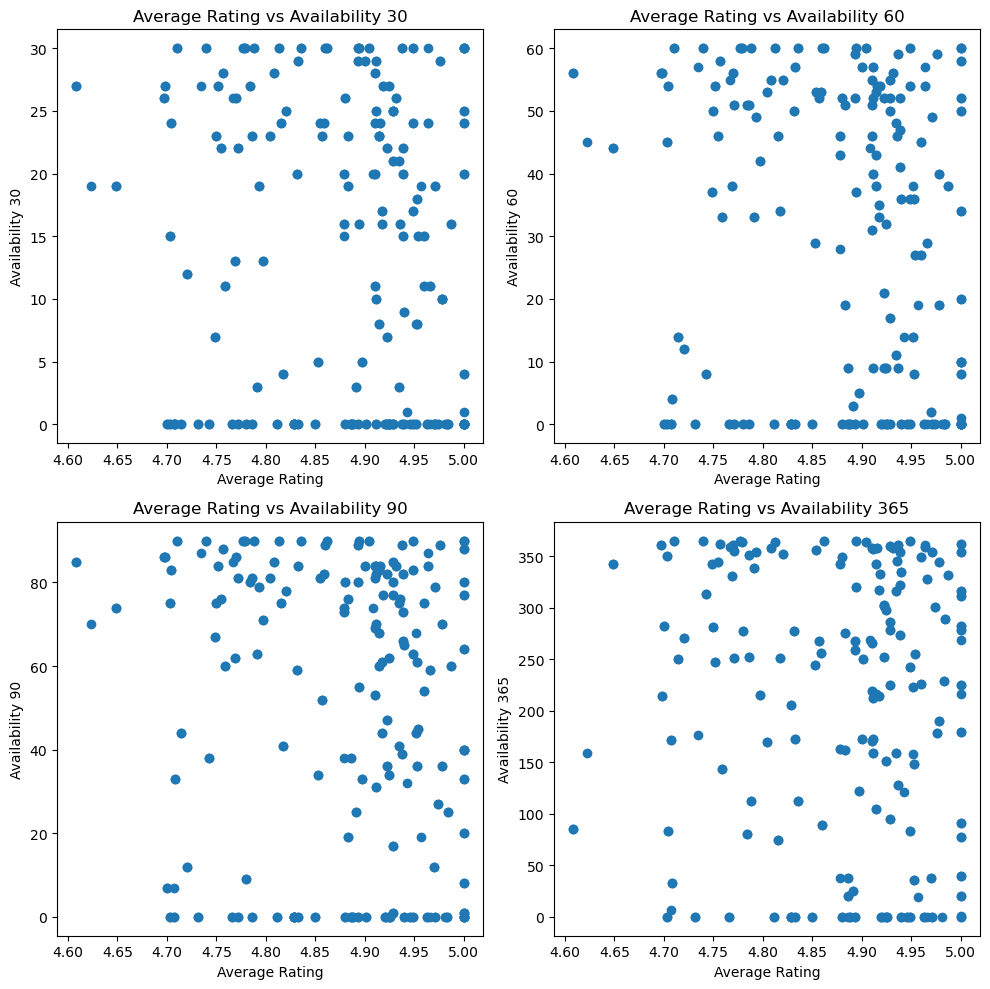

In [124]:
fig,axes = plt.subplots(2,2,figsize=(10,10))

axes[0,0].scatter(df['average_rating'],df['availability_30'])
axes[0,0].set_xlabel('Average Rating')
axes[0,0].set_ylabel('Availability 30')
axes[0,0].set_title('Average Rating vs Availability 30')

axes[0,1].scatter(df['average_rating'],df['availability_60'])
axes[0,1].set_xlabel('Average Rating')
axes[0,1].set_ylabel('Availability 60')
axes[0,1].set_title('Average Rating vs Availability 60')

axes[1,0].scatter(df['average_rating'],df['availability_90'])
axes[1,0].set_xlabel('Average Rating')
axes[1,0].set_ylabel('Availability 90')
axes[1,0].set_title('Average Rating vs Availability 90')

axes[1,1].scatter(df['average_rating'],df['availability_365'])
axes[1,1].set_xlabel('Average Rating')
axes[1,1].set_ylabel('Availability 365')
axes[1,1].set_title('Average Rating vs Availability 365')

plt.tight_layout()

#### Does the availability affects the rating?
#### The answer is yes as we increase the number of availability, the rating increases as shown in the graphs

Text(0, 0.5, 'Average Rate')

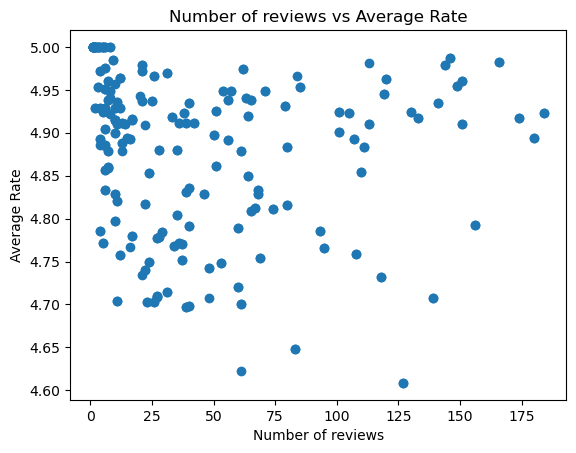

In [125]:
plt.scatter(df['number_of_reviews'],df['average_rating'])
plt.title('Number of reviews vs Average Rate')
plt.xlabel('Number of reviews')
plt.ylabel('Average Rate')

#### From the previous graph we can see that the number of reviews does not matter in terms of rating


<Axes: xlabel='rating_categories', ylabel='count'>

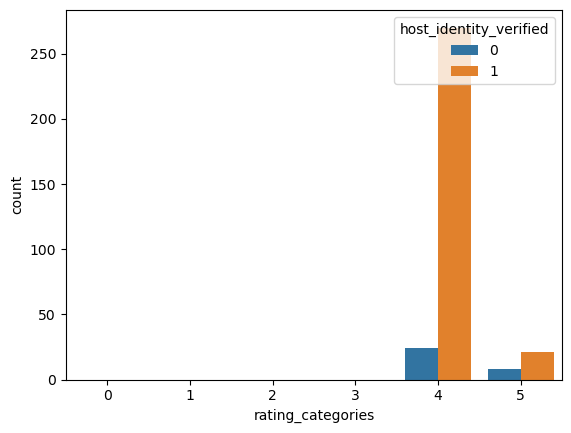

In [126]:
sns.countplot(x='rating_categories',hue='host_identity_verified',data = df)

#### The previous graph shows answers the question: If the host identity is verified, does this affect the rating?
#### The answer is yes, as we can see if the host identity is verified then it is most likely to have higher rating

<Axes: xlabel='rating_categories', ylabel='count'>

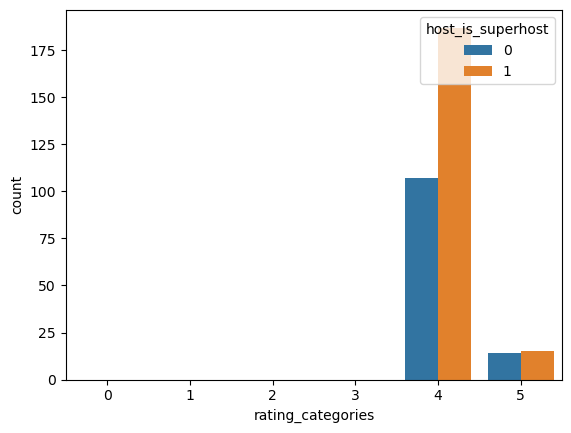

In [127]:
sns.countplot(x='rating_categories',hue='host_is_superhost',data = df)

#### The previous graph shows answers the question: If the host is superhost affects the rating and the price?
#### The answer is yes, as we can see in the interval from 4 to 5 it does matter if the host is superhost as it increases the rating, but it does not matter at value of 5 of the rating 
#### 'host is not a superhost': 0
#### 'host is superhost': 1

<Axes: xlabel='rating_categories', ylabel='count'>

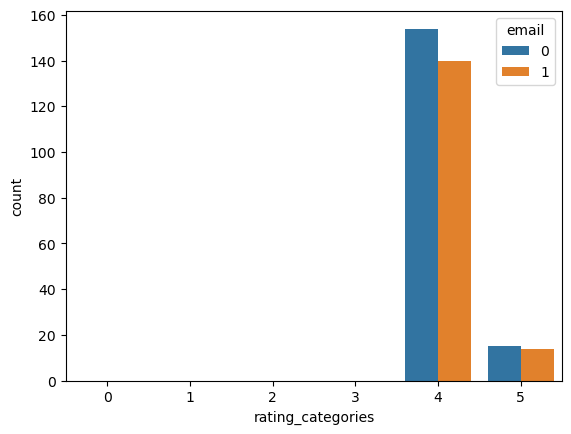

In [128]:
sns.countplot(x='rating_categories',hue='email',data = df)

#### When the host has an email, does this affect the rating?
#### The answer is no as we can see there is no difference when the host has an email or not

<Axes: xlabel='rating_categories', ylabel='count'>

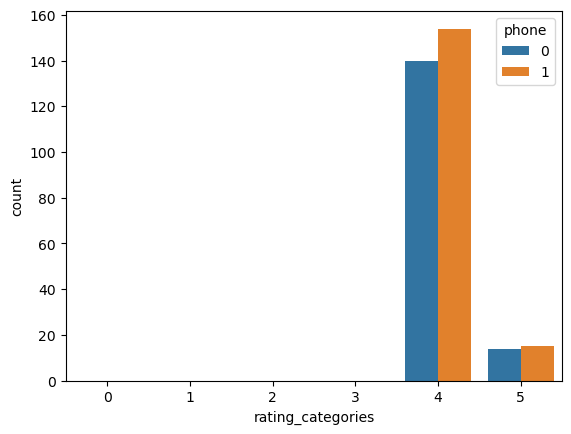

In [129]:
sns.countplot(x='rating_categories',hue='phone',data = df)

#### When the host has an phone, does this affect the rating?
#### The answer is no as we can see there is no big difference when the host has a phone or not

<Axes: xlabel='rating_categories', ylabel='count'>

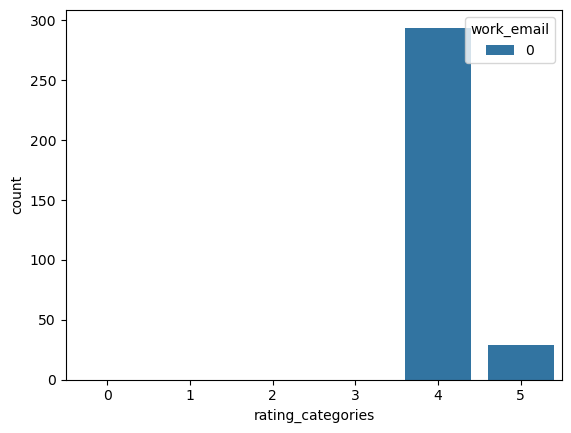

In [130]:
sns.countplot(x='rating_categories',hue='work_email',data = df)

#### When the host has an work email, does this affect the rating?
#### The answer is no as we can see there is no host after cleaning the data who has a work email

<Axes: xlabel='rating_categories', ylabel='count'>

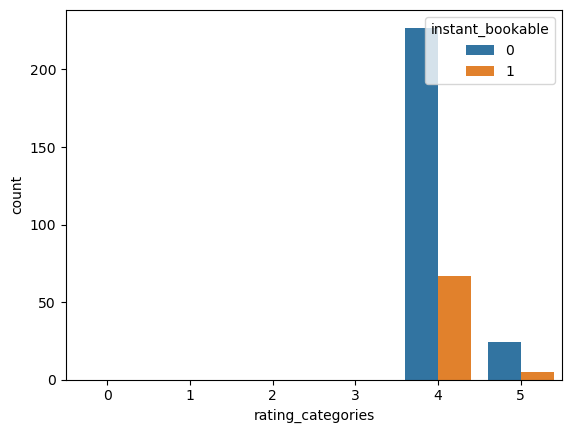

In [131]:
sns.countplot(x='rating_categories',hue='instant_bookable',data = df)

#### When property is instant bookable, does this affect the rating?
#### The answer is yes as we can see whent the propety is not instant bookable, it is more likely to have higher rating

## Recommendations:
### To increase the rating of a property in NY state, we should do the following:
#### 1- Make the host reapond within an hour maximum
#### 2- Make the property type Room in hotel and avoid Shared room in rental unit
#### 3- Make the neighbourhood cleansed is SIXTH WARD
#### 4- Make the host listing count between 1 and 12 and host total listing count is between 1 and 14
#### 5- Make the number of bedrooms and beds is equal to 3
#### 6- Increase the number of availabilities as possible
#### 7- Make the host identity verified and its prefferable that the host be superhost
#### 8- Surprisingly, make the property not instant bookable to increase the rating